In [1]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [2]:
def plot_image(img: np.array):
    plt.figure(figsize = (6,6))
    plt.imshow(img, cmap = "gray")

def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize = (12, 6))
    ax[0].imshow(img1, cmap = "gray")
    ax[1].imshow(img2, cmap = "gray")

## Convolution

- A special type of neural networks used for image classification, detection and segmentation
- Convolution are basically operation for detecting patterns in images
- Filters (a small matrix, usually rectangular but might vary depending upon need)
    - We have to specify the number before hand
    - These are basically pattern detectors
- Early convolutional layers detect basic patterns like edges, corners, etc.
- Later convolutional layers detect specialized patterns like paws, ears, etc.

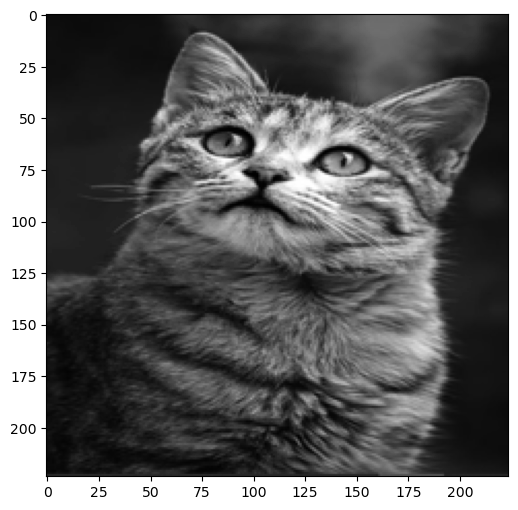

In [3]:
img = Image.open("images/cat.jpg")
img = ImageOps.grayscale(img)
img = img.resize(size = (224, 224))
plot_image(img)

### Filters
https://setosa.io/ev/image-kernels/#:~:text=An%20image%20kernel%20is%20a,%2C%20sharpening%2C%20outlining%20or%20embossing.

In [4]:
sharpen = np.array([[0, -1, 0],
                  [-1, 5, -1],
                  [0, -1, 0]])

blur = np.array([[0.0625, 0.125, 0.0625],
                [0.125, 0.25, 0.125],
                [0.0625, 0.125, 0.0625]])

outline = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

### Convolution

In [5]:
# formula : ((img_size - kernel_size)/s) + 1 ; s = stride here it is 1
def calculate_target_size(img_size: int, kernel_size: int) -> int:
    num_pixels = 0
    
    for i in range(img_size):
        added = i + kernel_size
        if added <= img_size:
            num_pixels += 1

    return num_pixels

In [6]:
calculate_target_size(224, 3)

222

In [7]:
subset = np.array(img)[0:0+3, 0:0+3]
subset

array([[20, 20, 20],
       [21, 21, 21],
       [22, 22, 21]], dtype=uint8)

In [8]:
np.multiply(subset, sharpen)

array([[  0, -20,   0],
       [-21, 105, -21],
       [  0, -22,   0]])

In [9]:
np.sum(np.multiply(subset, sharpen))

21

In [10]:
def convolve(img: np.array, kernel: np.array) -> np.array:
    tgt_size = calculate_target_size(img.shape[0], kernel.shape[0])
    k = kernel.shape[0]
    
    convolved_img = np.zeros(shape = (tgt_size, tgt_size))
    for i in range(tgt_size):
        for j in range(tgt_size):
            subset = np.array(img)[i: i+k, j: j+k]
            convolved_img[i, j] = np.sum(np.multiply(subset, kernel))
    return convolved_img

#### Sharpen

In [11]:
img_sharpened = convolve(np.array(img), sharpen)

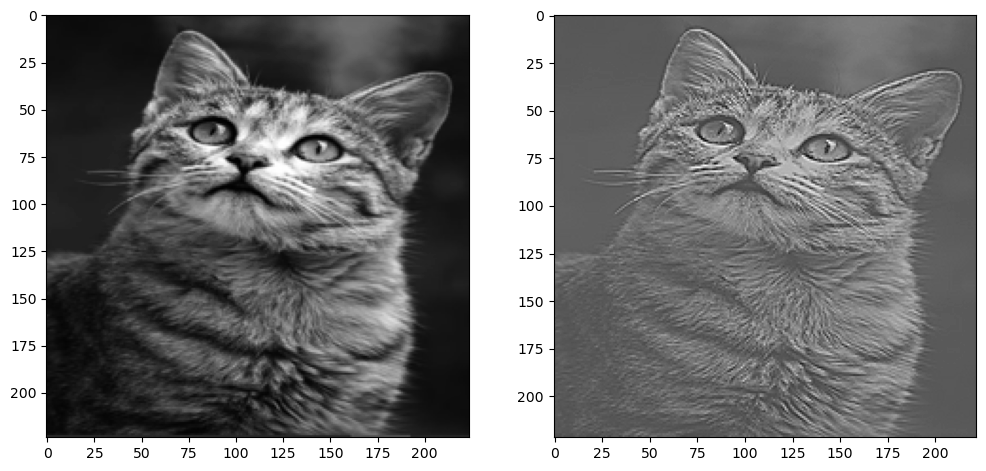

In [12]:
plot_two_images(img, img_sharpened)

In [13]:
def negative_to_zero(img: np.array) ->np.array:
    img = img.copy()
    img[img < 0] = 0
    return img

- We use negative to zero filter as there are some values that are negative and out matrix range from 0-222, thus the region weherever there are negative values will be excluded, in order to avoid this we use negative to zero.

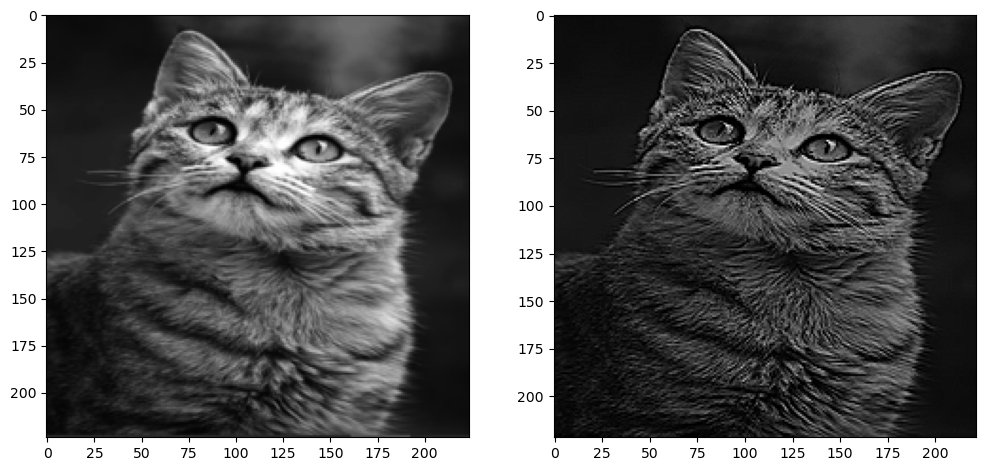

In [14]:
neg_2_zero = negative_to_zero(img_sharpened)
plot_two_images(img, neg_2_zero)

#### Blur

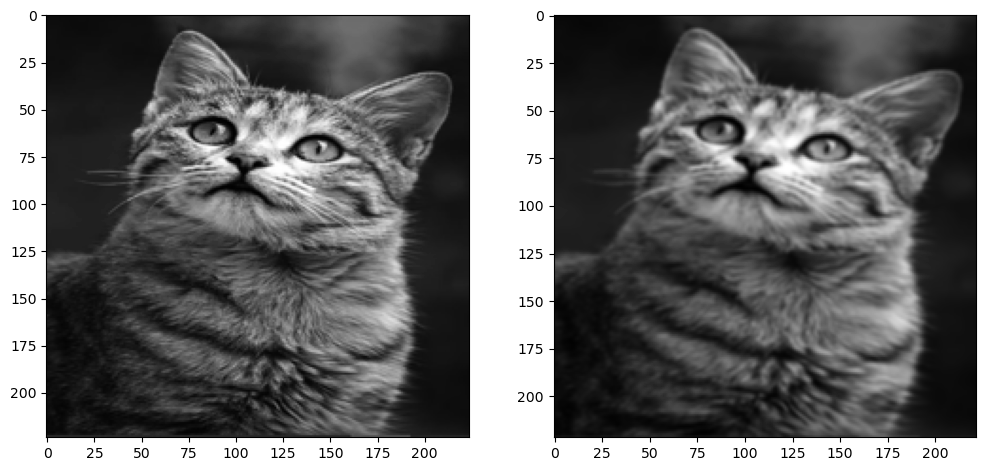

In [15]:
img_blur = convolve(np.array(img), blur)
neg_2_zero = negative_to_zero(img_blur)
plot_two_images(img, img_blur)

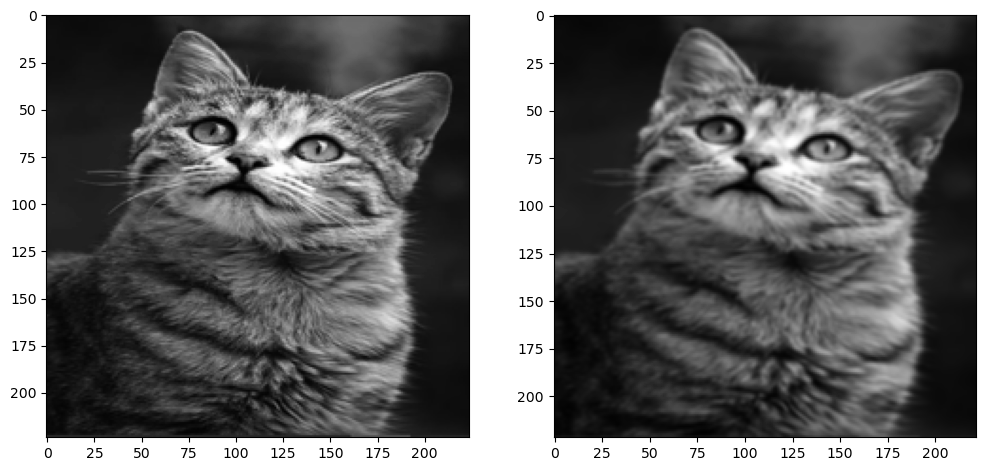

In [16]:
plot_two_images(img, neg_2_zero)

#### Outline

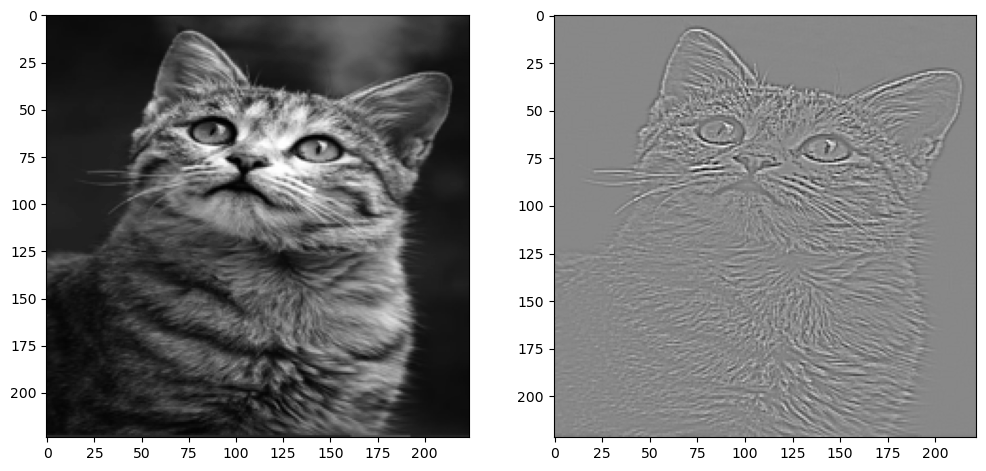

In [17]:
img_outline = convolve(np.array(img), outline)
neg_2_zero = negative_to_zero(img_outline)
plot_two_images(img, img_outline)

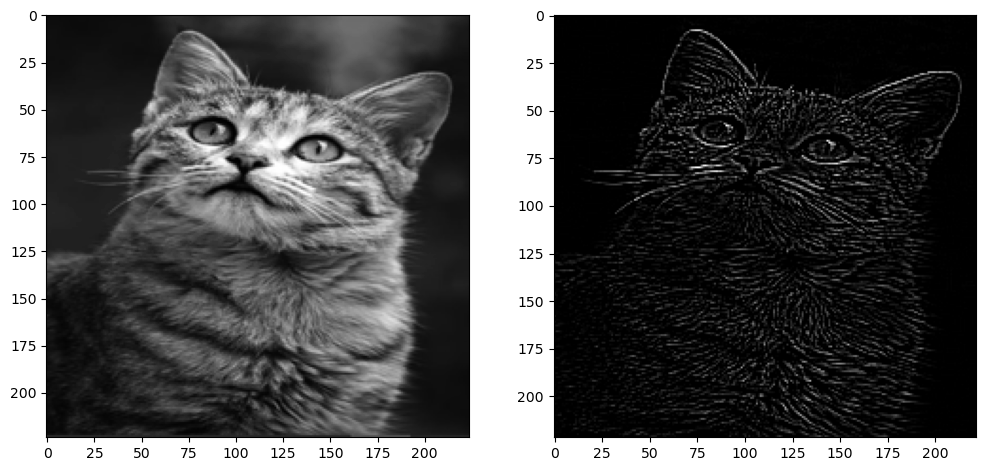

In [18]:
plot_two_images(img, neg_2_zero)